<a href="https://colab.research.google.com/github/ekolonsky/okj/blob/main/%D0%9E%D0%BA%D1%83%D0%B4%D0%B6%D0%B0%D0%B2%D0%B0_collect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import urllib, re
from bs4 import BeautifulSoup

url = 'https://shanson-text.ru/'
bulat = 'songs.php?id_singer=76'

def get_song(url_song):
  req = urllib.request.Request(url_song)
  resp = urllib.request.urlopen(req)
  respData = resp.read().decode('windows-1251')
  start = '</script>'
  finish = '<!-- Put this div tag to the place, where the Like block will be -->'
  i2 = respData.find(finish)
  i1 = respData[:i2].rfind(start) + len(start)
  ans = respData[i1:i2]
  ans = ans.replace('&nbsp',' ')
  ans = ans.replace('<br>','\n') 
  return ans

songs = {}

req = urllib.request.Request(url+bulat)
resp = urllib.request.urlopen(req)
respData = resp.read().decode('windows-1251')
items = re.findall(r'<li>(.*?)</li>', str(respData))         
for eachP in items:
    soup = BeautifulSoup(eachP)
    for link in soup.find_all('a'):
      song_name = link.contents[0]
      song_text = get_song(url + link['href'])
      songs[song_name] = song_text
      print(song_name)
    
    


Ax ты, шарик голубой
Ax, если бы можно уверенней
Ax, трубы медные гремят
А вот Резо - король марионеток
А годы уходят, уходят
А месяц тонкий-тонкий
А мы швейцару: "Отворите двери!"
Август в Латвии
Автопародия на несуществующие стихи
Ад
Аисты
Александр Сергеевич
Американская фантазия
Ангелы
Анкара, Анкара!
Антон Палыч Чехов однажды заметил
Апрель
Арбат беру с собою
Арбата больше нет
Арбатские напевы
Арбатский дворик
Арбатский романс
Арбатское вдохновение
Аты-баты, шли солдаты
Ах, война, она не год ещё протянет
Ах, если б знать заранее, заранее, заранее
Ах, оркестры духовые
Ах, что-то мне не верится
Баллада о Дон Кихотах
Баллада о пшене
Батальное полотно
Берега Голландии
Бери шинель - пошли домой
Бессмертье
Бесшумная эскадрилья
Благородные жёны безумных поэтов
Блиндажи той войны все травой заросли
Божественная суббота
Божественное
Большая перемена
Бродячие сапоги
Бумажный солдатик
Был Лондон предо мной
Былое нельзя воротить, и печалиться не о чем
Быстро молодость проходит
В Барабанном пе

In [ ]:
len(songs)

159

In [ ]:
cut = '</iframe>'
for song in songs:
  txt = songs[song]
  i = txt.find(cut)
  if i > 0:
    songs[song] = txt[i+len(cut):]

In [ ]:
songs

{'Ax ты, шарик голубой': '\n\n        Ax ты, шарик голубой,    \nгрустная планета,    \nчто ж мы делаем с тобой?    \nДля чего всё это?\n \nВсё мы топчемся в крови,    \nа ведь мы могли бы...    \nРеки, полные любви,    \nпо тебе текли бы! \n\n\n\n        \n\t\t',
 'Ax, если бы можно уверенней': '\n\n        Ax, если бы можно уверенней    \nи чётче в сей трудный момент: \nрасплывчатость чистых намерений —    \nне лучший к добру аргумент. \n\n\n\n        \n\t\t',
 'Ax, трубы медные гремят': '\n\n        Ax, трубы медные гремят,    \nкружится воинский парад —    \nза рядом ряд, за рядом ряд идут в строю солдаты.    \nНе в силах радость превозмочь,    \nпоёт жена, гордится дочь,    \nи только мать уходит прочь... Куда же ты, куда ты?\n \nИ боль, и пыль, и пушек гром...    \nАх, это будет всё потом,    \nчего ж печалиться о том — а может, обойдётся?    \nВедь нынче музыка — тебе,    \nтрубач играет на трубе,    \nмундштук трясётся на губе, трясётся он, трясётся. \n\n\n\n        \n\t\t',
 '

In [ ]:
import json
from google.colab import files
  
with open('okudjava_songs.txt', 'w', encoding='utf-8') as file:
     for song in songs:
       file.write('>> ' +song+'\n\n')
       file.write(songs[song].strip()+'\n\n')
files.download('okudjava_songs.txt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Корпус текстов песен сохранен в файле **okudjava_songs.txt** на локальном диске

In [ ]:
import json
from google.colab import files

uploaded = files.upload()  
file_name = "okudjava_songs.json"
ojs = json.loads(uploaded[file_name].decode("utf-8"))


Saving okudjava_songs.json to okudjava_songs (1).json


In [ ]:
import json
from google.colab import files

uploaded = files.upload()  
file_name = "okudjava_songs.txt"
corpus = uploaded[file_name].decode("utf-8")

Saving okudjava_songs.txt to okudjava_songs (4).txt


In [ ]:
corpus

' ax ты шарик голубой\n\nax ты шарик голубой    \nгрустная планета    \nчто ж мы делаем с тобой    \nдля чего всё это\n \nвсё мы топчемся в крови    \nа ведь мы могли бы    \nреки полные любви    \nпо тебе текли бы\n\n ax если бы можно уверенней\n\nax если бы можно уверенней    \nи чётче в сей трудный момент \nрасплывчатость чистых намерений     \nне лучший к добру аргумент\n\n ax трубы медные гремят\n\nax трубы медные гремят    \nкружится воинский парад     \nза рядом ряд за рядом ряд идут в строю солдаты    \nне в силах радость превозмочь    \nпоёт жена гордится дочь    \nи только мать уходит прочь куда же ты куда ты\n \nи боль и пыль и пушек гром    \nах это будет всё потом    \nчего ж печалиться о том  а может обойдётся    \nведь нынче музыка  тебе    \nтрубач играет на трубе    \nмундштук трясётся на губе трясётся он трясётся\n\n а вот резо  король марионеток\n\nа вот резо  король марионеток \nчей тонок вкус и каждый палец меток    \nмарионетки из его ребра    \nв них много и насм

In [ ]:
import string

spec_chars = string.punctuation + '\xa0«»\t—…' 

def remove_chars_from_text(text, chars):
    return "".join([ch.lower() for ch in text if ch not in chars])

corpus = remove_chars_from_text(corpus, spec_chars)


In [ ]:
!pip install nltk

In [ ]:
import nltk
from nltk import word_tokenize
nltk.download('punkt')
tokens = word_tokenize(corpus)





[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')
russian_stopwords = stopwords.words("russian")
russian_stopwords.extend(['что-то', 'свой','словно','который','пусть','наш','чтоть', 'всё','это', 'весь','ещё', 'ах',\
                          'твой','ваш','её','его'])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
russian_stopwords

In [ ]:
!pip install pymorphy2

     |████████████████████████████████| 55 kB 3.2 MB/s 
     |████████████████████████████████| 8.2 MB 31.1 MB/s 


In [ ]:
import pymorphy2
morph = pymorphy2.MorphAnalyzer(lang='ru')

In [ ]:
tokens = word_tokenize(corpus)
tokens = [w for w in tokens if morph.parse(w)[0].tag.POS in ['NOUN', 'ADJF']]
#tokens = [morph.parse(w)[0].normal_form for w in tokens]
tokens = [w for w in tokens if w not in russian_stopwords]



In [ ]:
from nltk.probability import FreqDist
text_tokens = nltk.Text(tokens)
fdist = FreqDist(text_tokens)

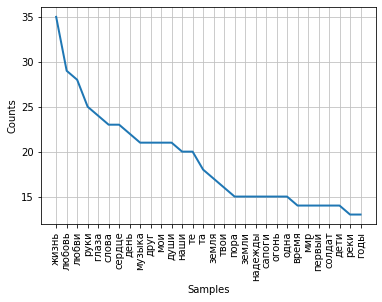

In [ ]:
fdist.plot(30,cumulative=False)

In [ ]:
fdist.most_common(30)

[('жизнь', 35),
 ('любовь', 29),
 ('любви', 28),
 ('руки', 25),
 ('глаза', 24),
 ('слова', 23),
 ('сердце', 23),
 ('день', 22),
 ('музыка', 21),
 ('друг', 21),
 ('мои', 21),
 ('души', 21),
 ('наши', 20),
 ('те', 20),
 ('та', 18),
 ('земля', 17),
 ('твои', 16),
 ('пора', 15),
 ('земли', 15),
 ('надежды', 15),
 ('сапоги', 15),
 ('огонь', 15),
 ('одна', 15),
 ('время', 14),
 ('мир', 14),
 ('первый', 14),
 ('солдат', 14),
 ('дети', 14),
 ('реки', 13),
 ('годы', 13)]

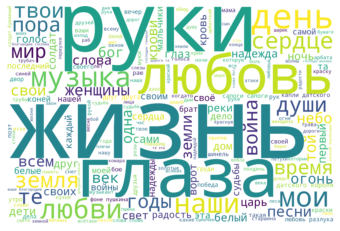

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

wordcloud = WordCloud(background_color="white", collocations=True, width = 3000, height = 2000).generate(" ".join(text_tokens))

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
len(text_tokens)

1508